##**Task 6: Visualizations**

To gain deeper insights into customer churn patterns, we'll create a series of advanced visualizations using Seaborn and Matplotlib. These visualizations will help uncover relationships between different features and churn status.

**Importing the libraries and Data Preprocessing**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

# Load the dataset

df = pd.read_csv('/content/Telco_Customer_Churn_Dataset .csv')


# Display basic dataset info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert 'TotalCharges' to numeric (handling empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values (if any)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Convert 'Churn' to binary (1/0) for some analyses
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Display cleaned data info
print("\nData Types:")
print(df.dtypes)

Dataset Shape: (7043, 21)

First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.5    No
2  3668-QPYBK    Male              0      No         No       2          Yes          

/tmp/ipython-input-1-1522694277.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


##*Visualization*

**1. Tenure Distribution by Churn Status**

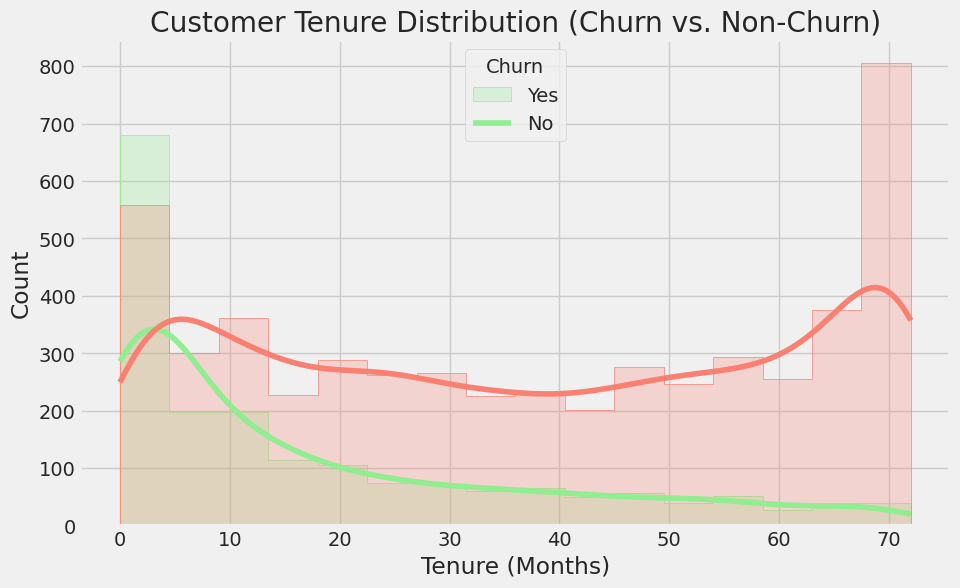

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, element='step', palette=['salmon', 'lightgreen'])
plt.title('Customer Tenure Distribution (Churn vs. Non-Churn)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Yes', 'No'])
plt.show()

Insight:

New customers (0-5 months) are more likely to churn.

Long-term customers (60+ months) rarely churn.

**2.Monthly Charges vs. Churn (Box Plot & Violin Plot)**

/tmp/ipython-input-4-402012446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=['lightgreen', 'salmon'])


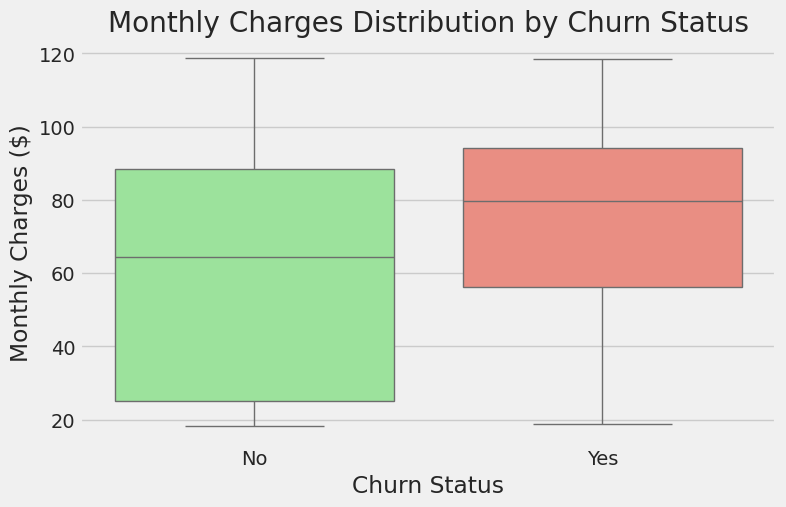

/tmp/ipython-input-4-402012446.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette=['lightgreen', 'salmon'], split=True)


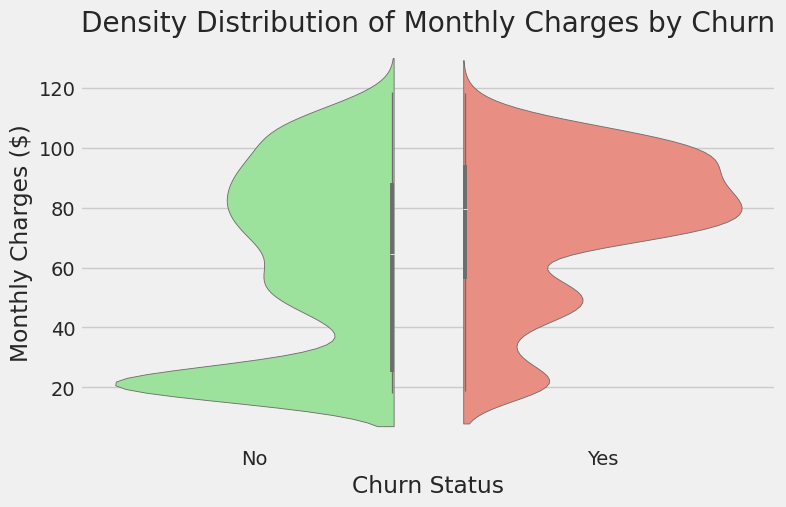

In [4]:
# Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=['lightgreen', 'salmon'])
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges ($)')
plt.show()

# Violin Plot (shows density distribution)
plt.figure(figsize=(8, 5))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette=['lightgreen', 'salmon'], split=True)
plt.title('Density Distribution of Monthly Charges by Churn')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges ($)')
plt.show()

Insight:

Churned customers tend to have higher median monthly charges.

The violin plot reveals a bimodal distribution for churned customers, suggesting two distinct groups (possibly different pricing tiers).



*Categorical Feature Analysis*

**1.Churn Rate by Contract Type (Stacked Bar Plot)**

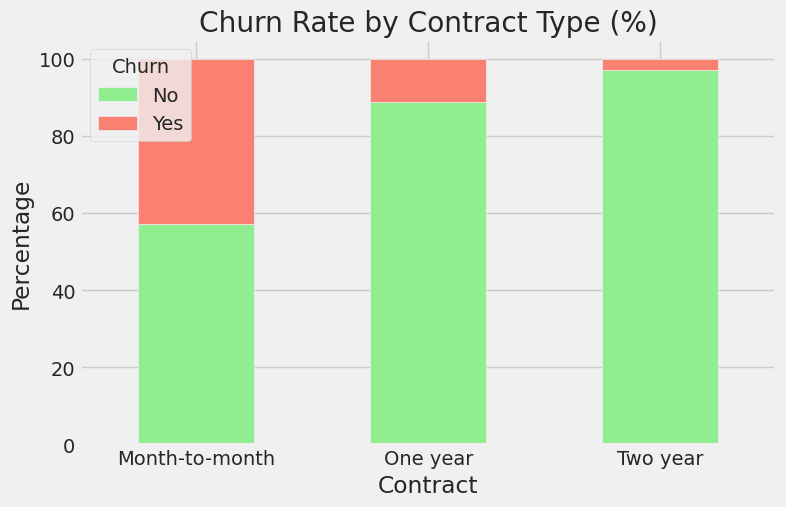

In [6]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'], figsize=(8, 5))
plt.title('Churn Rate by Contract Type (%)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

Insight:

Month-to-month contracts have the highest churn.

Two-year contracts have the lowest churn, proving long-term commitments improve retention.

**2. Churn Rate by Internet Service (Heatmap)**

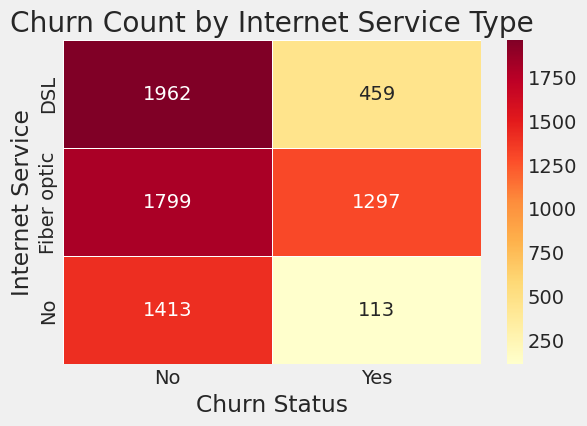

In [7]:
internet_churn = pd.crosstab(df['InternetService'], df['Churn'])
plt.figure(figsize=(6, 4))
sns.heatmap(internet_churn, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5)
plt.title('Churn Count by Internet Service Type')
plt.xlabel('Churn Status')
plt.ylabel('Internet Service')
plt.show()

*Pair Plots (Multivariate Analysis)*

**1. Pair Plot for Numerical Features (Tenure, Monthly Charges, Total Charges)**

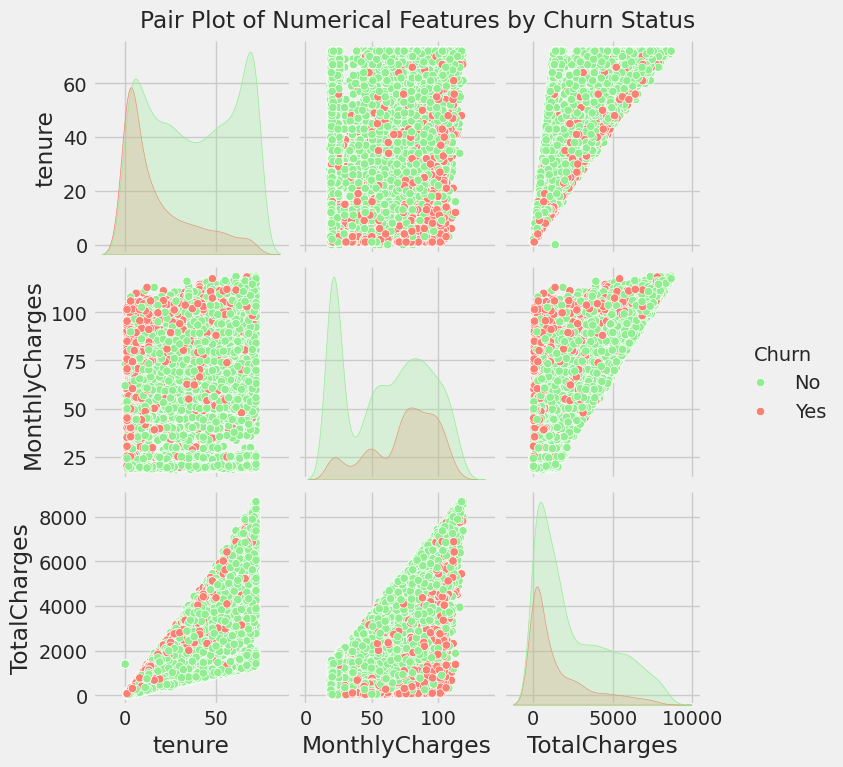

In [8]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(df[num_features + ['Churn']], hue='Churn', palette=['lightgreen', 'salmon'], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Churn Status', y=1.02)
plt.show()

Insight:

TotalCharges vs. Tenure: Long-term customers generate more revenue.

MonthlyCharges vs. Tenure: Higher monthly fees correlate with early churn.

Key Takeaways from the above visualization:

High-risk customers:

-New subscribers (0-5 months).

-Month-to-month contract holders.

-Fiber optic users with high monthly fees.

Protective factors:

-Long-term contracts reduce churn.

-Automatic payments improve retention.